In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='poster')

In [25]:
df=pd.read_excel('/home/suhananujum/Telecom customer Preprocessed Data.xlsx')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,1,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,2,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,3,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,4,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-1.235224,1


Our aim is to do a supervised UMAP on this dataset


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [27]:
df=df.drop(columns=['Unnamed: 0'])

In [28]:
import umap

In [29]:
data=df.iloc[:,:-1]
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.398608
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.948762
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.641883
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.983710
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.235224


In [30]:
target=df.iloc[:,-1]
target.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [31]:
target.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    5174
1    1869
Name: Churn, dtype: int64

There are 5174 people labelled 0 so for the time being we will assume that this was a low churn i.e these people renewed their subscriptions

In [32]:
classes = [
    '0',
    '1']

In [33]:
import umap

## Unsupervised UMAP

In [34]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 22.8 s, sys: 952 ms, total: 23.7 s
Wall time: 7.57 s


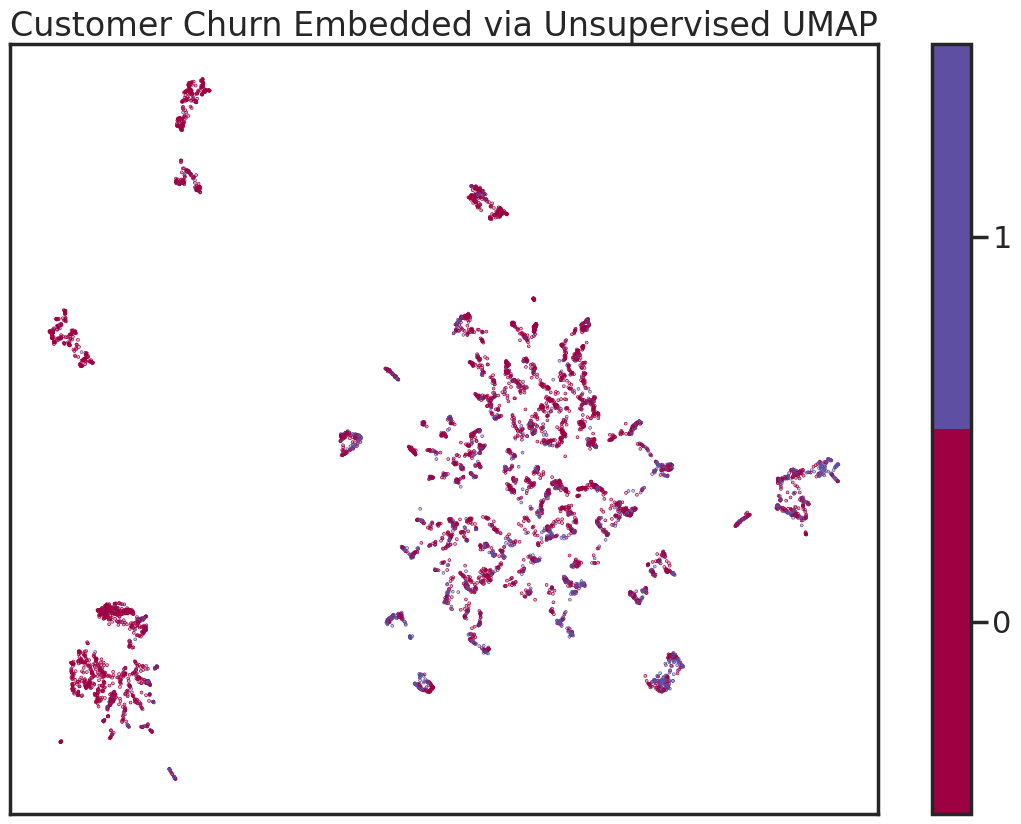

In [35]:
    fig, ax = plt.subplots(1, figsize=(14, 10))
    plt.scatter(u[:,0], u[:,1], c=target,s=0.3, cmap='Spectral', alpha=1.0)
    plt.setp(ax,xticks=[], yticks=[])
    #there are 2 classes-churn or no churn
    cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
    cbar.set_ticks(np.arange(2))
    cbar.set_ticklabels(classes)
    plt.title('Customer Churn Embedded via Unsupervised UMAP');
    plt.show()

## Unsupervised UMAP Manual Parameter Tuning

In [36]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig, ax = plt.subplots(1, figsize=(8, 6))
    plt.scatter(u[:,0], u[:,1], c=target,s=0.3, cmap='Spectral', alpha=1.0)
    plt.setp(ax,xticks=[], yticks=[])
    #there are 2 classes-churn or no churn
    cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
    cbar.set_ticks(np.arange(2))
    cbar.set_ticklabels(classes)
    plt.title(title, fontsize=14)
    plt.show()

## Minimum Distance

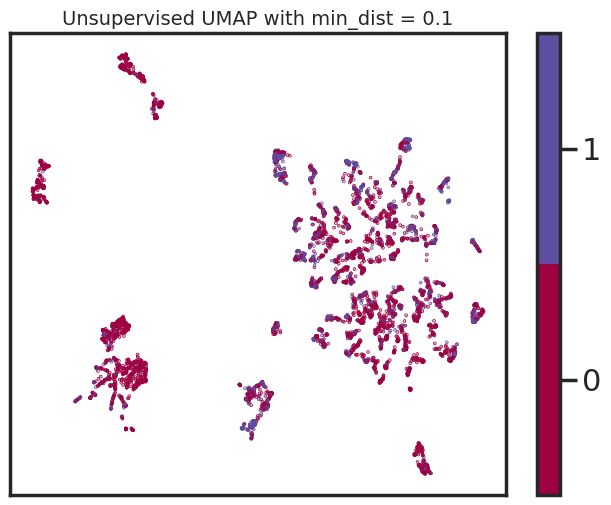

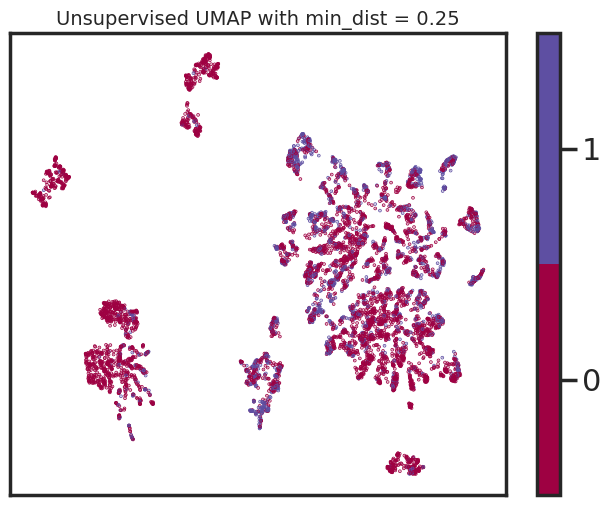

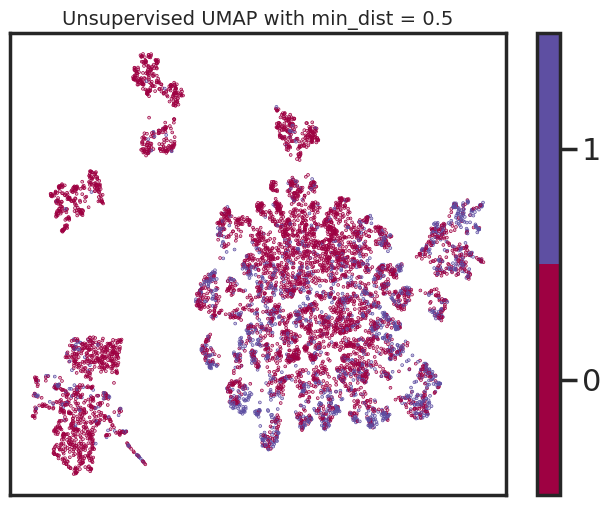

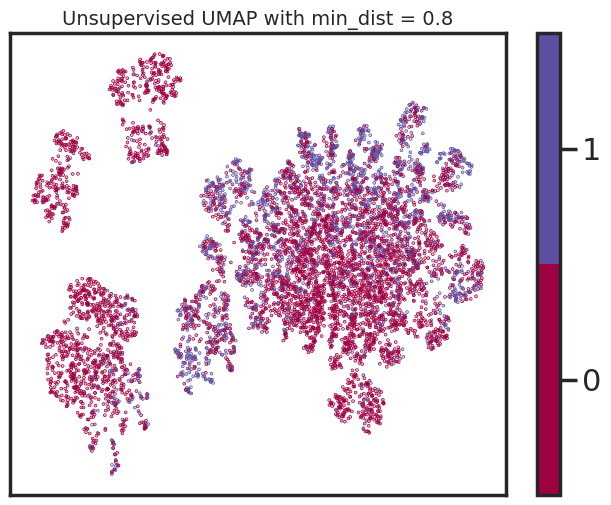

In [37]:
for d in ( 0.1, 0.25, 0.5, 0.8):
    draw_umap(min_dist=d, title='Unsupervised UMAP with min_dist = {}'.format(d))

## N_Neighbours

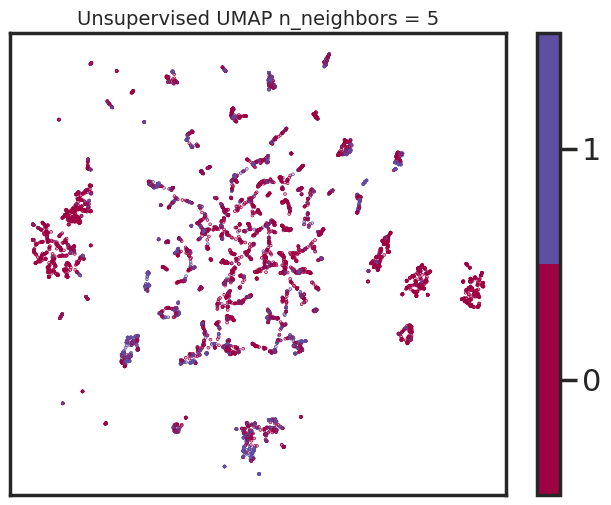

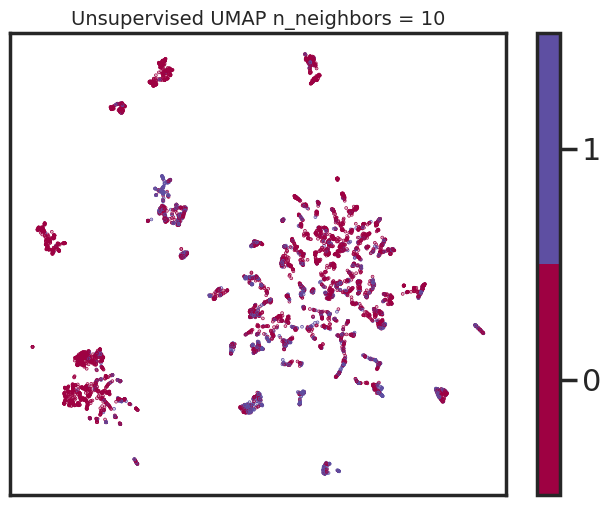

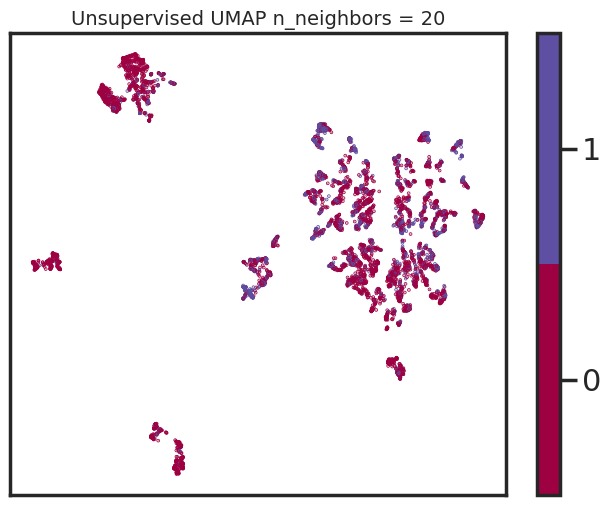

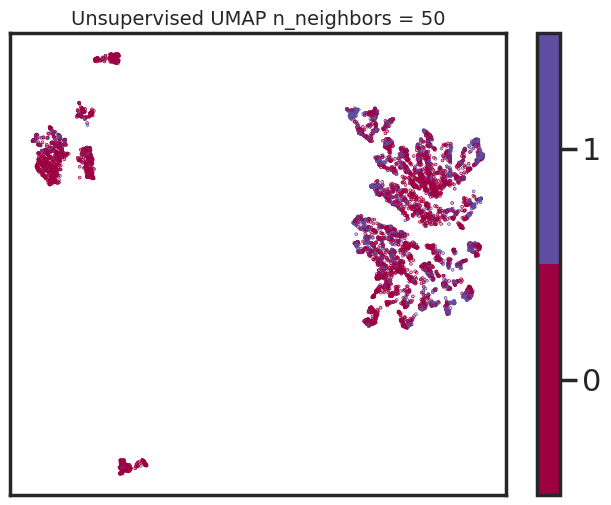

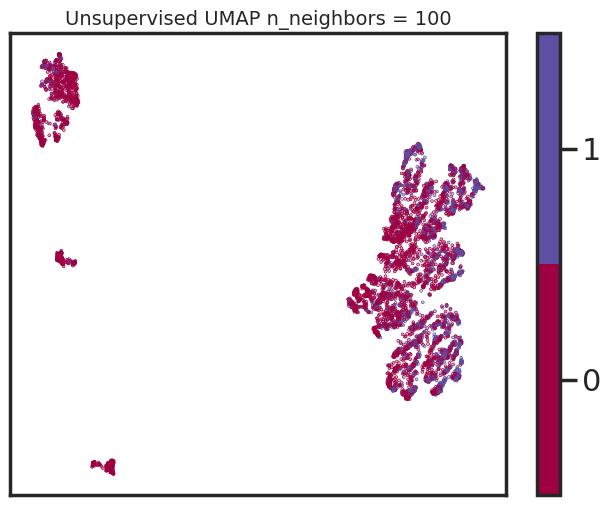

In [38]:
for n in (5, 10, 20, 50, 100):
    draw_umap(n_neighbors=n, title='Unsupervised UMAP n_neighbors = {}'.format(n))

It seems 0.1 minimum distance and 20 nearest neighbours give good cluster definition. We will do hyperparameter tuning to verify this

## Supervised UMAP Manual Parameter Tuning

In [39]:
fit = umap.UMAP()
%time u = fit.fit_transform(data,y=target)

CPU times: user 36 s, sys: 1.65 s, total: 37.6 s
Wall time: 11.6 s


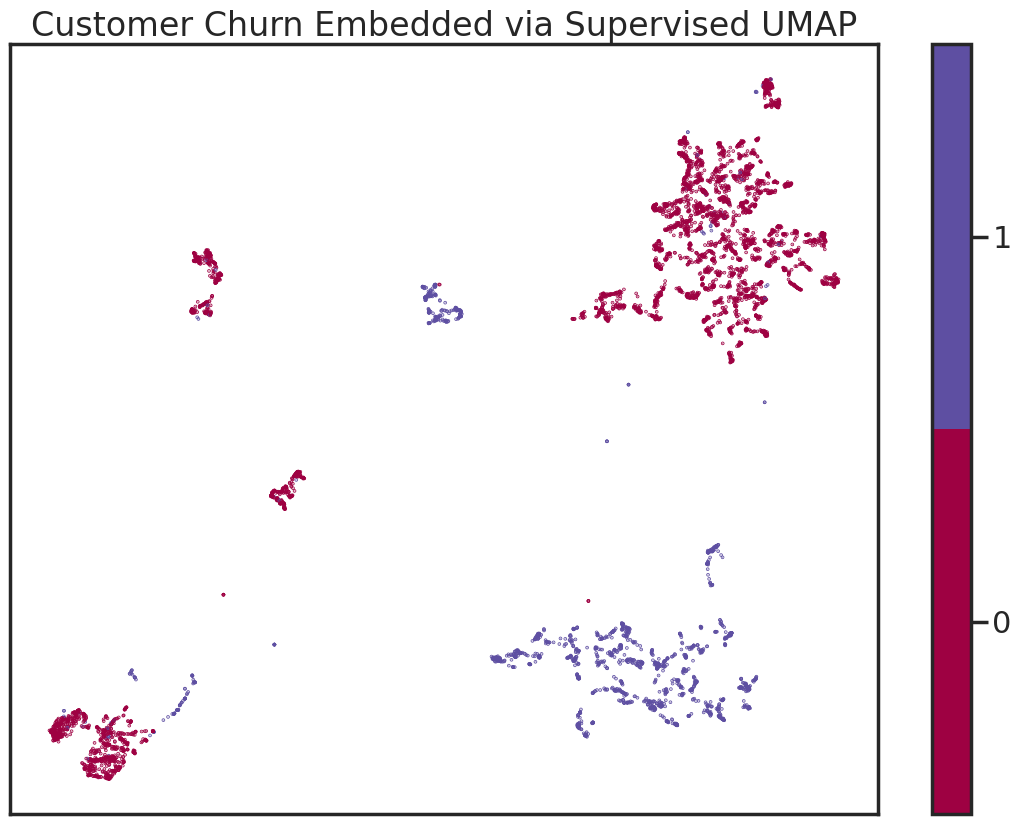

In [40]:
    fig, ax = plt.subplots(1, figsize=(14, 10))
    plt.scatter(u[:,0], u[:,1], c=target,s=0.3, cmap='Spectral', alpha=1.0)
    plt.setp(ax,xticks=[], yticks=[])
    #there are 2 classes-churn or no churn
    cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
    cbar.set_ticks(np.arange(2))
    cbar.set_ticklabels(classes)
    plt.title('Customer Churn Embedded via Supervised UMAP');
    plt.show()

## Supervised UMAP Manual Parameter Tuning

In [41]:
def draw_umap_label(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data,y=target);
    fig, ax = plt.subplots(1, figsize=(8, 6))
    plt.scatter(u[:,0], u[:,1], c=target,s=0.3, cmap='Spectral', alpha=1.0)
    plt.setp(ax,xticks=[], yticks=[])
    #there are 2 classes-churn or no churn
    cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
    cbar.set_ticks(np.arange(2))
    cbar.set_ticklabels(classes)
    plt.title(title, fontsize=14)
    plt.show()

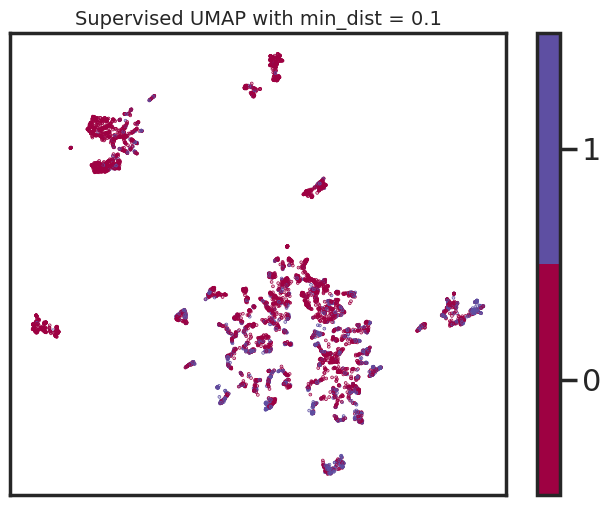

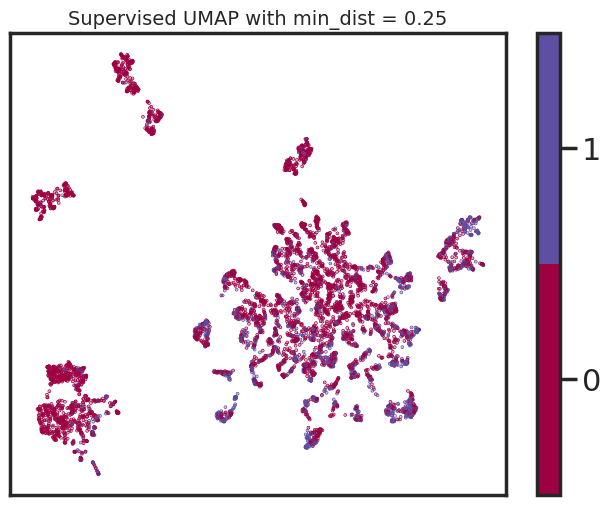

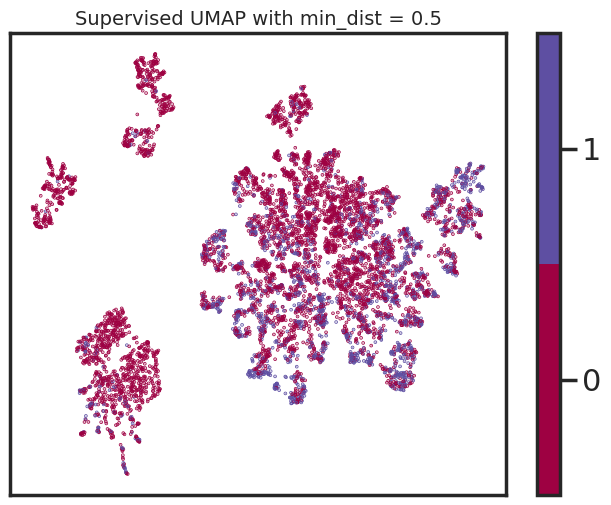

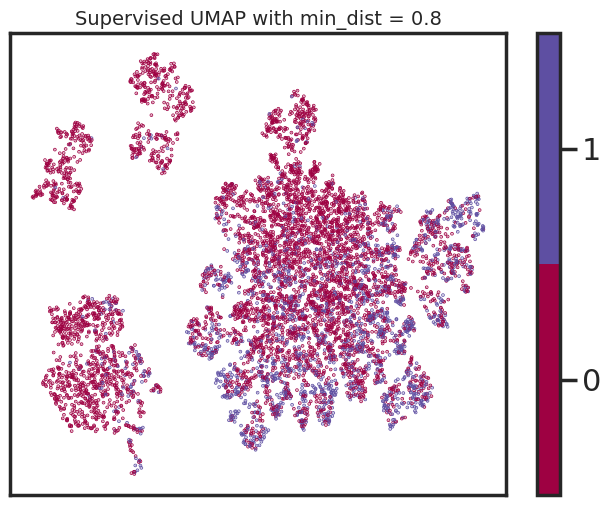

In [23]:
for d in ( 0.1, 0.25, 0.5, 0.8):
    draw_umap_label(min_dist=d, title='Supervised UMAP with min_dist = {}'.format(d))

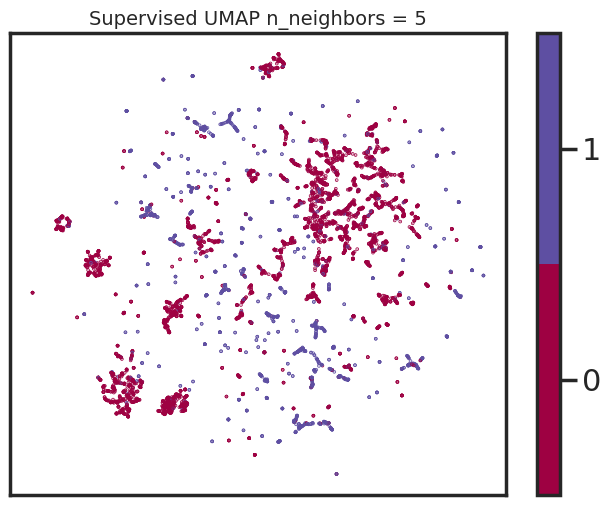

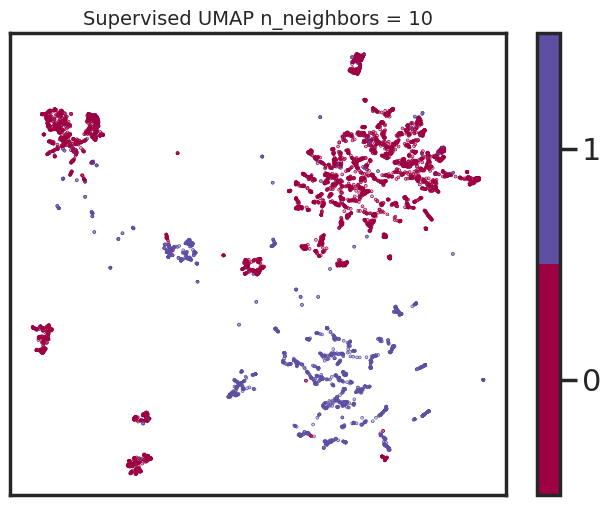

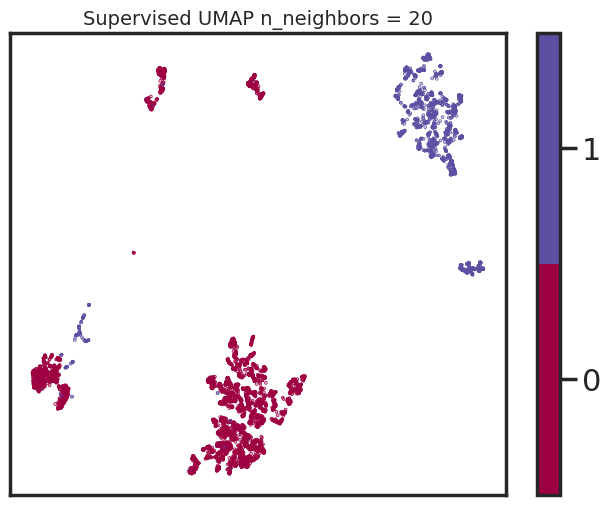

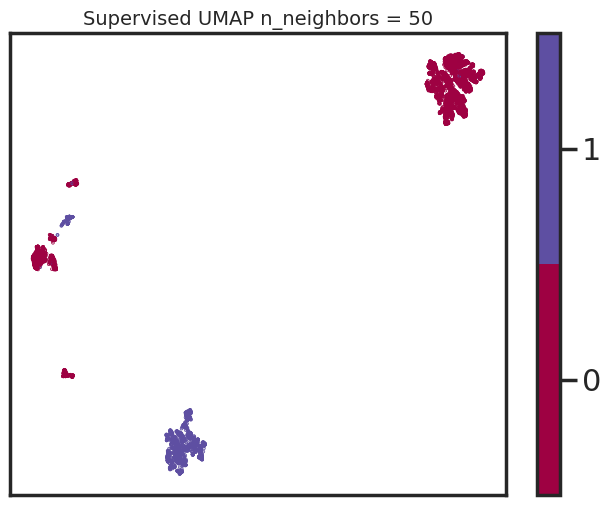

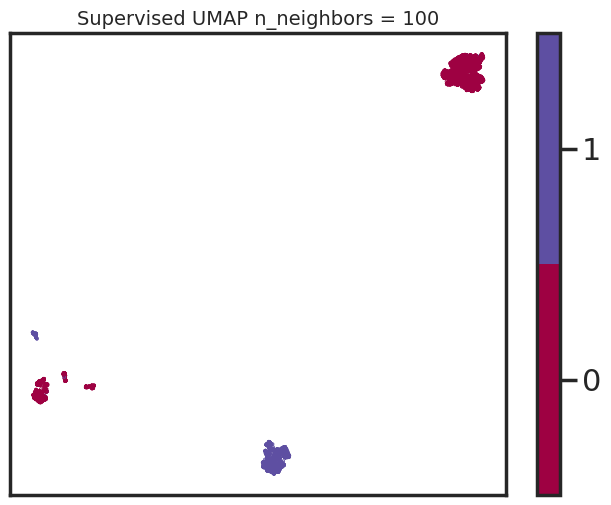

In [42]:
for n in (5, 10, 20, 50, 100):
    draw_umap_label(n_neighbors=n, title='Supervised UMAP n_neighbors = {}'.format(n))